In [1]:
import gym
import gym_example
from utils import *

# Training protagonist and adversary

To train adversarial v-3, which includes training of the protagonist to compute reward -later it will be regret, when we include both protagonist and antagonist-. For each environment generated by the adversary we can visualize how it looks, shortest path between agent and goal, and the cumulative reward achieved by the protagonist.

### Without running ray

Shortest path:  18
Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.
PROTAGONIST: 
Steps:  10000  Cumulative reward:  -0.7052538999400678  Episode Length:  234.04761904761904
Steps:  10000  Cumulative reward:  -0.7052538999400678  Episode Length:  234.04761904761904
Steps:  10000  Cumulative reward:  -0.7052538999400678  Episode Length:  234.04761904761904
Converting ./models/antagonist/AnimalAI/frozen_graph_def.pb to ./models/antagonist/AnimalAI.nn
GLOBALS: 'is_continu

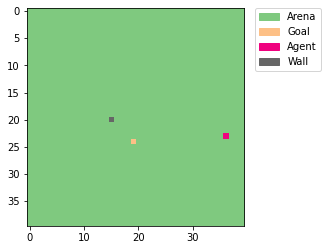

In [2]:
env = gym.make("adversarial-v4")
sum_reward = run_one_episode(env)
print('Sum reward: ', sum_reward)

In [ ]:
sum_reward = run_one_episode(env)
print('Sum reward: ', sum_reward)

## Running ray 

In [2]:
import os
import shutil

chkpt_root = "tmp/w_PAIRED_0"

shutil.rmtree(chkpt_root, ignore_errors=True, onerror=None)
ray_results = "{}/ray_results/".format(os.getenv("HOME"))
shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

In [3]:
import ray

ray.init(ignore_reinit_error=True, local_mode=True)

2021-04-16 19:51:42,712	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '128.178.51.133',
 'raylet_ip_address': '128.178.51.133',
 'redis_address': '128.178.51.133:6379',
 'object_store_address': '/tmp/ray/session_2021-04-16_19-51-42_210033_477329/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-04-16_19-51-42_210033_477329/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-04-16_19-51-42_210033_477329',
 'metrics_export_port': 49898,
 'node_id': 'e6c77ef0bc7144c65cf1b0c27d17b3ff9cd6d0bf6ced3d5a1916ab5a'}

In [4]:
from ray.tune.registry import register_env
from gym_example.envs.adversarial_v4 import Adversarial_v4
import ray.rllib.agents.ppo as ppo

select_env = "adversarial-v4"
register_env(select_env, lambda config: Adversarial_v4())

config = ppo.DEFAULT_CONFIG.copy()

config["log_level"] = "WARN"
agent = ppo.PPOTrainer(config, env=select_env)

2021-04-16 19:51:48,976	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-04-16 19:51:48,977	INFO trainer.py:643 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-04-16 19:51:49,063	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-16 19:51:49,982	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-16 19:51:50,888	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-04-16 19:51:53,468	WARNING util.py:47 -- Install gputil for GPU system monitoring.


Shortest path:  8
Converting ./models/protagonist/AnimalAI/frozen_graph_def.pb to ./models/protagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/protagonist/AnimalAI.nn file.


Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 398, in _send_bytes
    self._send(buf)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


PROTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Converting ./models/antagonist/AnimalAI/frozen_graph_def.pb to ./models/antagonist/AnimalAI.nn
GLOBALS: 'is_continuous_control', 'version_number', 'memory_size', 'action_output_shape'
IN: 'visual_observation_0': [-1, 84, 84, 3] => 'policy/main_graph_0_encoder0/conv_1/BiasAdd'
IN: 'vector_observation': [-1, 1, 1, 3] => 'policy/main_graph_0/hidden_0/BiasAdd'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice'
IN: 'action_masks': [-1, 1, 1, 6] => 'policy_1/strided_slice_1'
OUT: 'policy/concat/concat', 'action'
DONE: wrote ./models/antagonist/AnimalAI.nn file.
ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps

Process Process-26:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-27:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in w

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 5 is still in use. You may need to manually close a previously opened environment or use a different worker number.


PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-31:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-32:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-36:
Traceback (most recent call last):
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  17


Process Process-37:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 0 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in wor

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-43:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process P

Process Process-47:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  12


Process Process-49:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker

Process Process-53:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
OSError: [Errno 98] Address already in use
mlagents_envs.exception.UnityWorkerInUseE

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-55:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-59:
Traceback (most recent call last):
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  39


Process Process-61:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envir

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Process Process-65:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/an

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-67:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envir

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Process Process-71:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  31


Process Process-73:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envir

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-77:
Traceback (most recent call last):
  File "/home/paula/an

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-79:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process P

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-83:
Traceback (most recent call last):
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  29


Process Process-85:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envir

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker nu

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-91:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process P

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Process Process-95:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/an

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  15


Process Process-97:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envir

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  Fi

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-103:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_confi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-107:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  27


Process Process-109:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-110:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-113:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-115:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-119:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  20


Process Process-121:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)

During handling of the above exception, another exception oc

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-127:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-128:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-131:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  7


Process Process-133:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-134:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-137:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-139:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Process Process-143:
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  26


Process Process-145:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker nu

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-151:
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 1 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in wo

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker nu

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  32


Process Process-157:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)

During handling of the above exception, another exception oc

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-163:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.wo

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  22


Process Process-169:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-173:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-175:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_chann

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-179:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  18


Process Process-181:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

Process Process-185:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-187:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  Fi

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  49


Process Process-193:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-197:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-199:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-200:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

Process Process-203:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  37


Process Process-205:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

Process Process-209:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-211:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  20


Process Process-217:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
Process Process-218:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_a

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Process Process-221:
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-223:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Process Process-227:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  20


Process Process-229:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception oc

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-235:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-239:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  43


Process Process-241:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-242:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-245:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-247:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-248:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-251:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  14


Process Process-253:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-257:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-259:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Process Process-263:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  24


Process Process-265:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-269:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-271:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worke

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker nu

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  18


Process Process-277:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-281:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-283:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-287:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  35


Process Process-289:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-295:
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 1 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in wo

Process Process-299:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  24


Process Process-301:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-307:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-308:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-311:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  4


Process Process-313:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-314:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker nu

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-319:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-323:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  7


Process Process-325:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process 

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-329:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-331:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-335:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  37


Process Process-337:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Process Process-341:
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-343:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)

During handling of the above exception, another exception oc

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  44


Process Process-349:
Traceback (most recent call last):
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_fac

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-353:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-355:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-356:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/en

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
OSError: [Errno 98] Address already in use
mlagents_envs.exception.UnityWorkerInUseException: Couldn't s

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  39


Process Process-361:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)

During handling of the above exception, another exception oc

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-367:
Traceback (most recent call last):
  File "/home/paula/AnimalAI-Olympics/animalai/animalai/envs/environment.py", line 64, in __init__
    side_channels=self.side_channels,
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Process Process-371:
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  8


Process Process-373:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-374:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/en

OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  Fi

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-379:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

Process Process-383:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  9


Process Process-385:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-389:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-391:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-392:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-395:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  20


Process Process-397:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
   

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-401:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-403:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 106, in __init__
    self.communicator = self.get_communicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worke

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Process Process-407:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  45


Process Process-409:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-410:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/en

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Process Process-413:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-415:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.wo

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  7


Process Process-421:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
Process Process-422:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56,

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-425:
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-427:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shar

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-431:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  12


Process Process-433:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
Process Process-437:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
Traceback (most recent call last):
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-439:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-440:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/en

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Process Process-443:
Traceback (most recent call last):
  File "/home/paula/a

ANTAGONIST: 
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  10000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Shortest path:  25


Process Process-445:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
Process Process-449:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)
mlagents_envs.exception.UnityWorkerInUseException: Couldn't start socket communication because worker number 3 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Traceback (most recent call last):
  File "/home/paula/a

PROTAGONIST: 
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0
Steps:  20000  Cumulative reward:  -0.9999999310821296  Episode Length:  248.0


Process Process-455:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai
    worker_id, [shared_float_properties, engine_configuration_channel]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/environment_factory_aai.py", line 56, in create_unity_envi

Shortest path:  26


Process Process-458:
Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-459:
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 43, in worker_aai

  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/environment.py", line 170, in get_communicator
    return RpcCommunicator(worker_id, base_port, timeout_wait)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 77, in check_port
    s.bind(("localhost", port))
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 48, in __init__
    self.create_server()
OSError: [Errno 98] Address already in use
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 54, in create_server
    self.check_port(self.port)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/rpc_communicator.py", line 79, in check_port
    raise UnityWorkerInUseException(self.worker_id)

During handling of the above exception, another exception occurred:

mlagents_envs.exception.Un

RayTaskError: [36mray::RolloutWorker.par_iter_next()[39m (pid=477329, ip=128.178.51.133)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/timers.py", line 258, in wrapped
    return func(*args, **kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/trainer_controller.py", line 201, in start_learning
    self._reset_env(env_manager)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents_envs/timers.py", line 258, in wrapped
    return func(*args, **kwargs)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/trainer_controller_aai.py", line 48, in _reset_env
    env.reset(config=new_meta_curriculum_config)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/env_manager.py", line 57, in reset
    self.first_step_infos = self._reset_env(config)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/subprocess_env_manager_aai.py", line 143, in _reset_env
    ew.previous_step = EnvironmentStep(ew.recv().payload, ew.worker_id, {})
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/subprocess_env_manager.py", line 66, in recv
    response: EnvironmentResponse = self.conn.recv()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

[36mray::RolloutWorker.par_iter_next()[39m (pid=477329, ip=128.178.51.133)
  File "python/ray/_raylet.pyx", line 476, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 480, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 432, in ray._raylet.execute_task.function_executor
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/util/iter.py", line 1152, in par_iter_next
    return next(self.local_it)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/rollout_worker.py", line 327, in gen_rollouts
    yield self.sample()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/rollout_worker.py", line 662, in sample
    batches = [self.input_reader.next()]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 95, in next
    batches = [self.get_data()]
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 224, in get_data
    item = next(self.rollout_provider)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/evaluation/sampler.py", line 686, in _env_runner
    base_env.send_actions(actions_to_send)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/env/base_env.py", line 346, in send_actions
    self.vector_env.vector_step(action_vector)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/ray/rllib/env/vector_env.py", line 143, in vector_step
    obs, r, done, info = self.envs[i].step(actions[i])
  File "/home/paula/AnimalAI-Olympics/examples/adversary_design/gym_example/envs/adversarial_v4.py", line 131, in step
    load_model=self.load_model, num_envs=6)
  File "/home/paula/AnimalAI-Olympics/examples/adversary_design/utils.py", line 267, in train_antagonist
    run_training_aai(1, args)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/animalai_train/run_training_aai.py", line 115, in run_training_aai
    env_manager.close()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/subprocess_env_manager.py", line 267, in close
    env_worker.close()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/site-packages/mlagents/trainers/subprocess_env_manager.py", line 80, in close
    self.process.join()
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/paula/anaconda3/envs/animalai/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

[36mray::RolloutWorker.par_iter_next()[39m (pid=477329, ip=128.178.51.133)
  File "python/ray/_raylet.pyx", line 473, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 497, in ray._raylet.execute_task
ray.exceptions.TaskCancelledError: Task: TaskID(ffffffffffffffffffffffffffffffffffffffff01000000) was cancelled

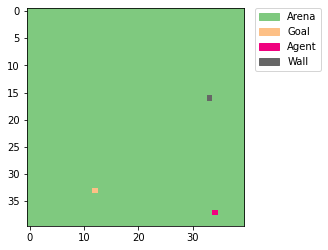

In [5]:
status = "{:2d} reward {:6.2f}/{:6.2f}/{:6.2f} len {:4.2f} saved {}"
n_iter = 1
for n in range(n_iter):
    result = agent.train()
    chkpt_file = agent.save(chkpt_root)
    print(status.format(
            n + 1,
            result["episode_reward_min"],
            result["episode_reward_mean"],
            result["episode_reward_max"],
            result["episode_len_mean"],
            chkpt_file
            ))